In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

import sklearn 
from sklearn.linear_model import LinearRegression

import scipy 
from scipy import stats 

plt.style.use("./data/d4sci.mplstyle")


In [2]:
def pearson (x,y):
    meanx=x.mean()
    meany=y.mean()
    stdx=x.std()
    stdy=y.std()
    return np.mean((x-meanx)*(y-meany))/(stdx*stdy)

In [3]:
x=np.random.random(1000)
y=np.random.random(1000)

In [4]:
pearson(x,x)

1.0

In [5]:
pearson(y,y)

0.9999999999999998

In [6]:
pearson(x,y)

0.016460893409660726

Text(0, 0.5, 'y')

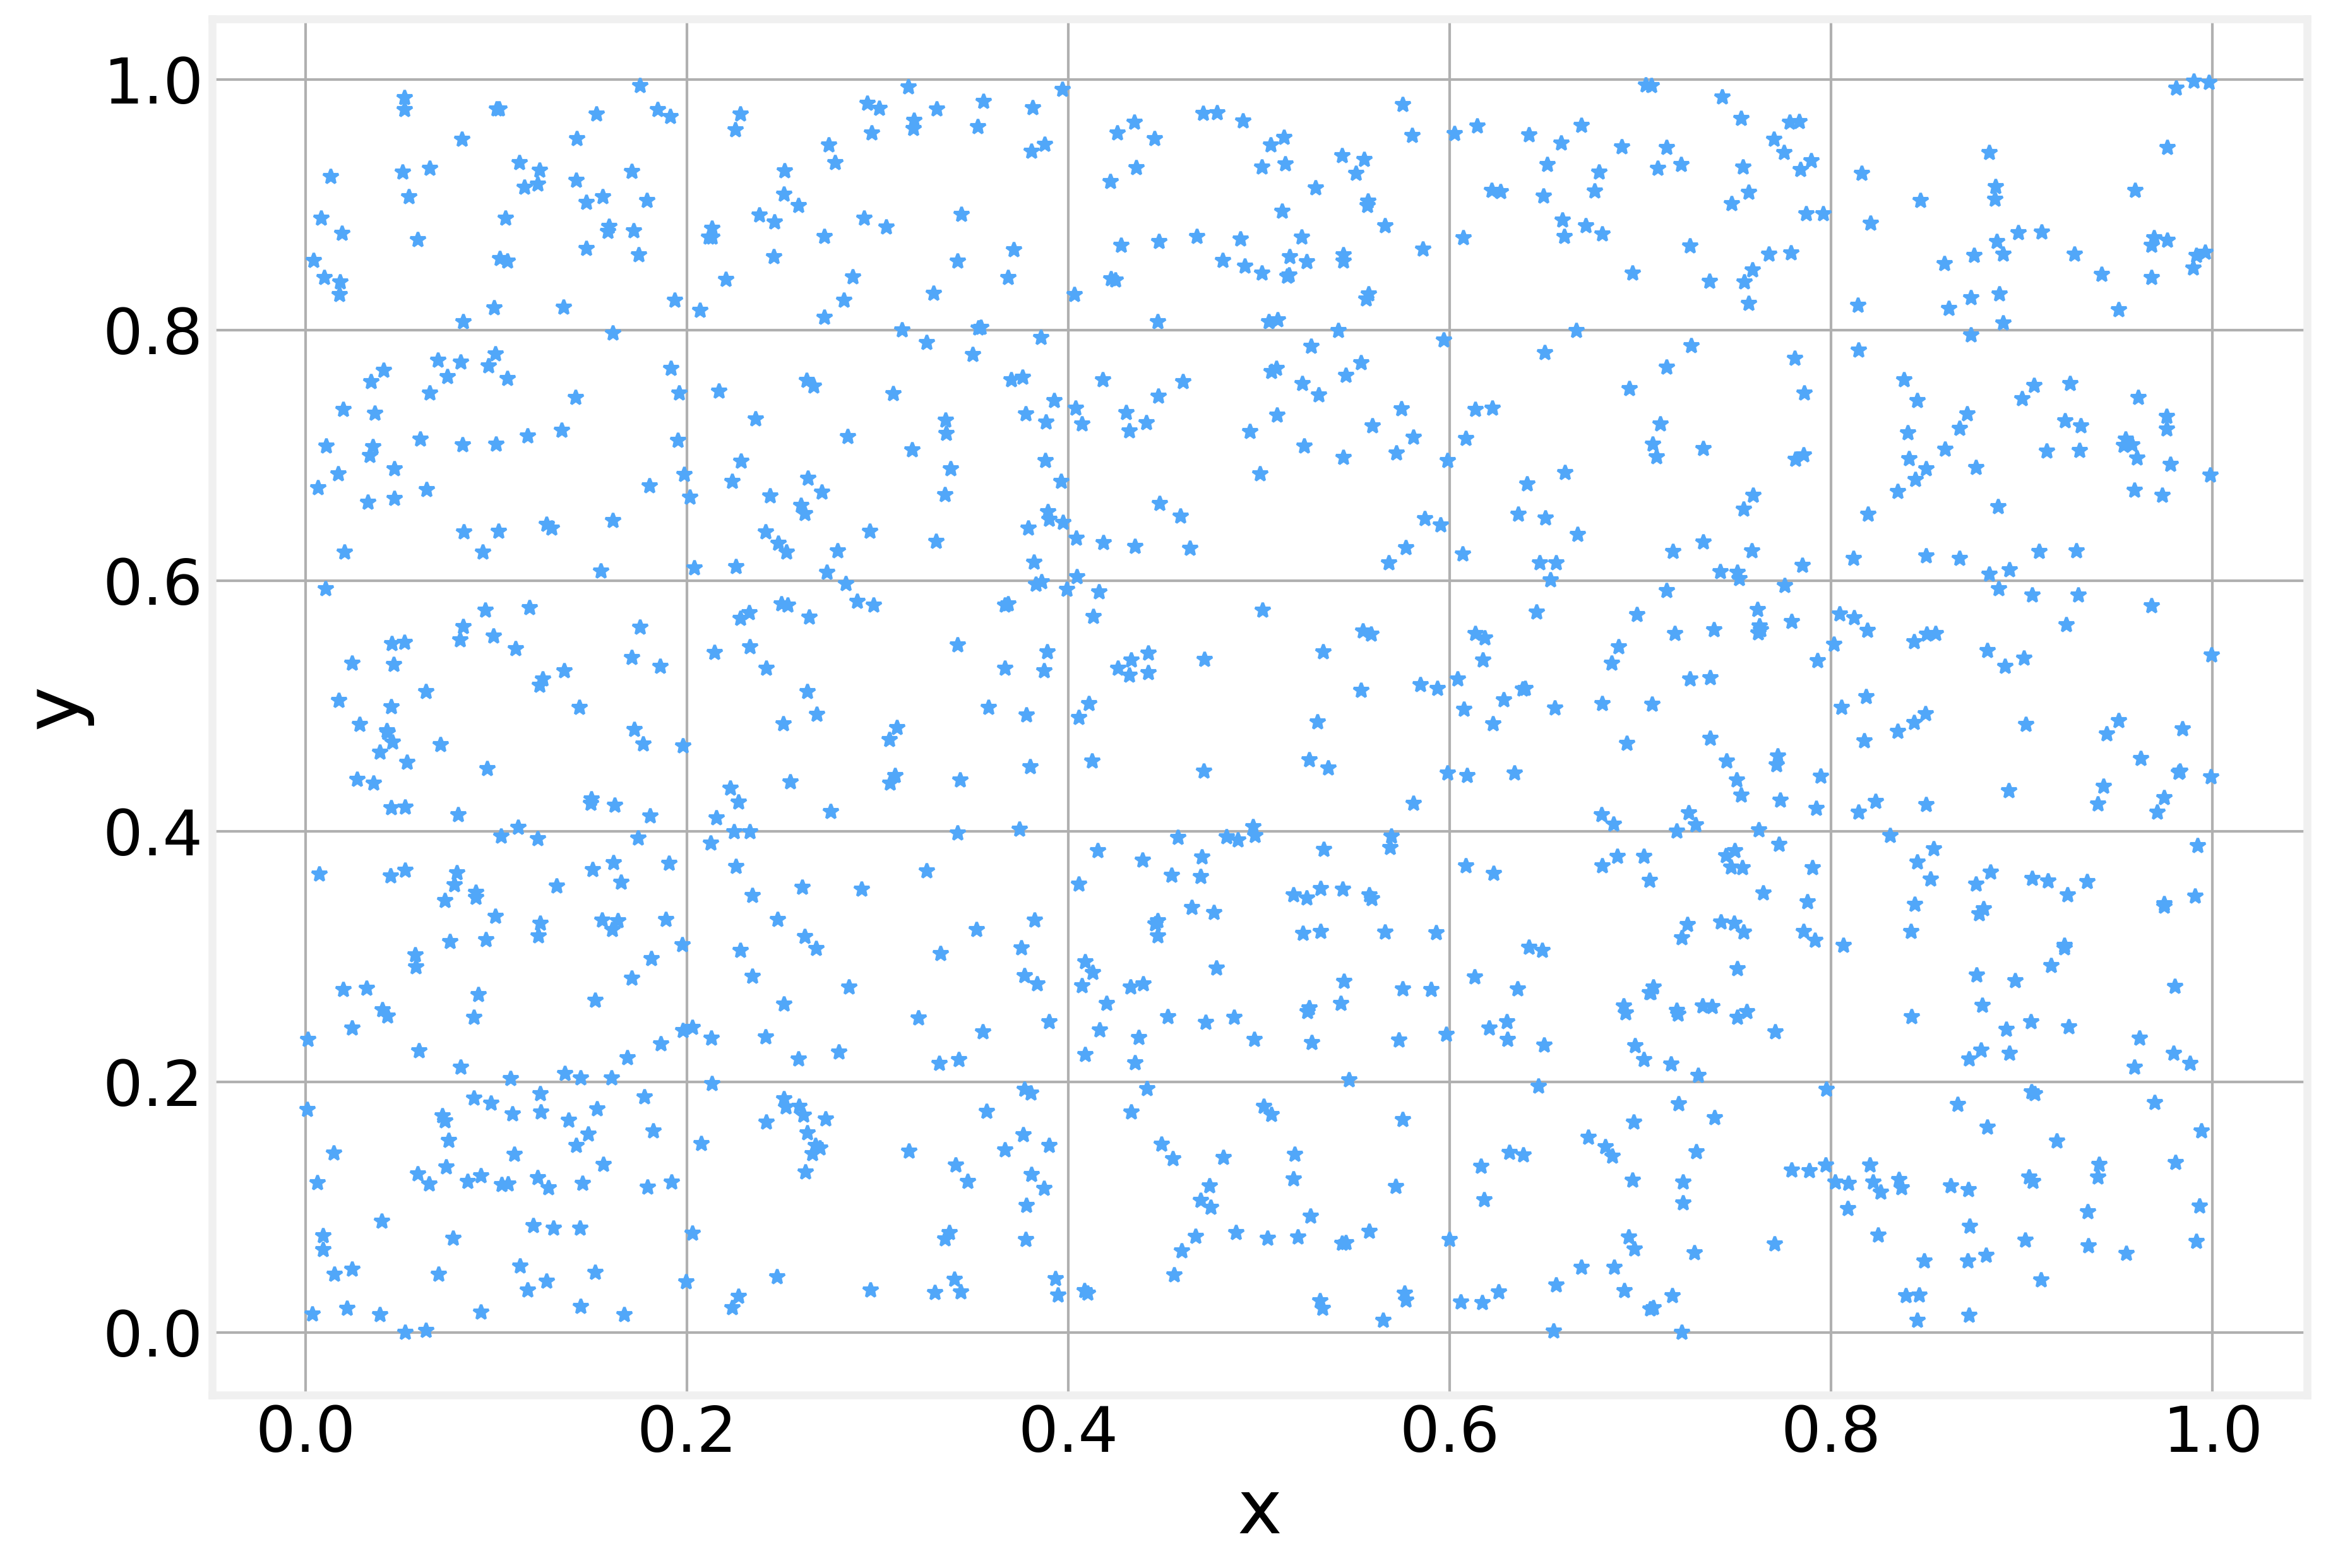

In [7]:
fig,axs=plt.subplots(1,1)
axs.plot(x,y,"*")
axs.set_xlabel("x")
axs.set_ylabel("y")

In [8]:
trend = np.linspace(1,5,1000)
pearson(x+trend,y+trend)


0.9431550231688767

Text(0, 0.5, 'y + trend')

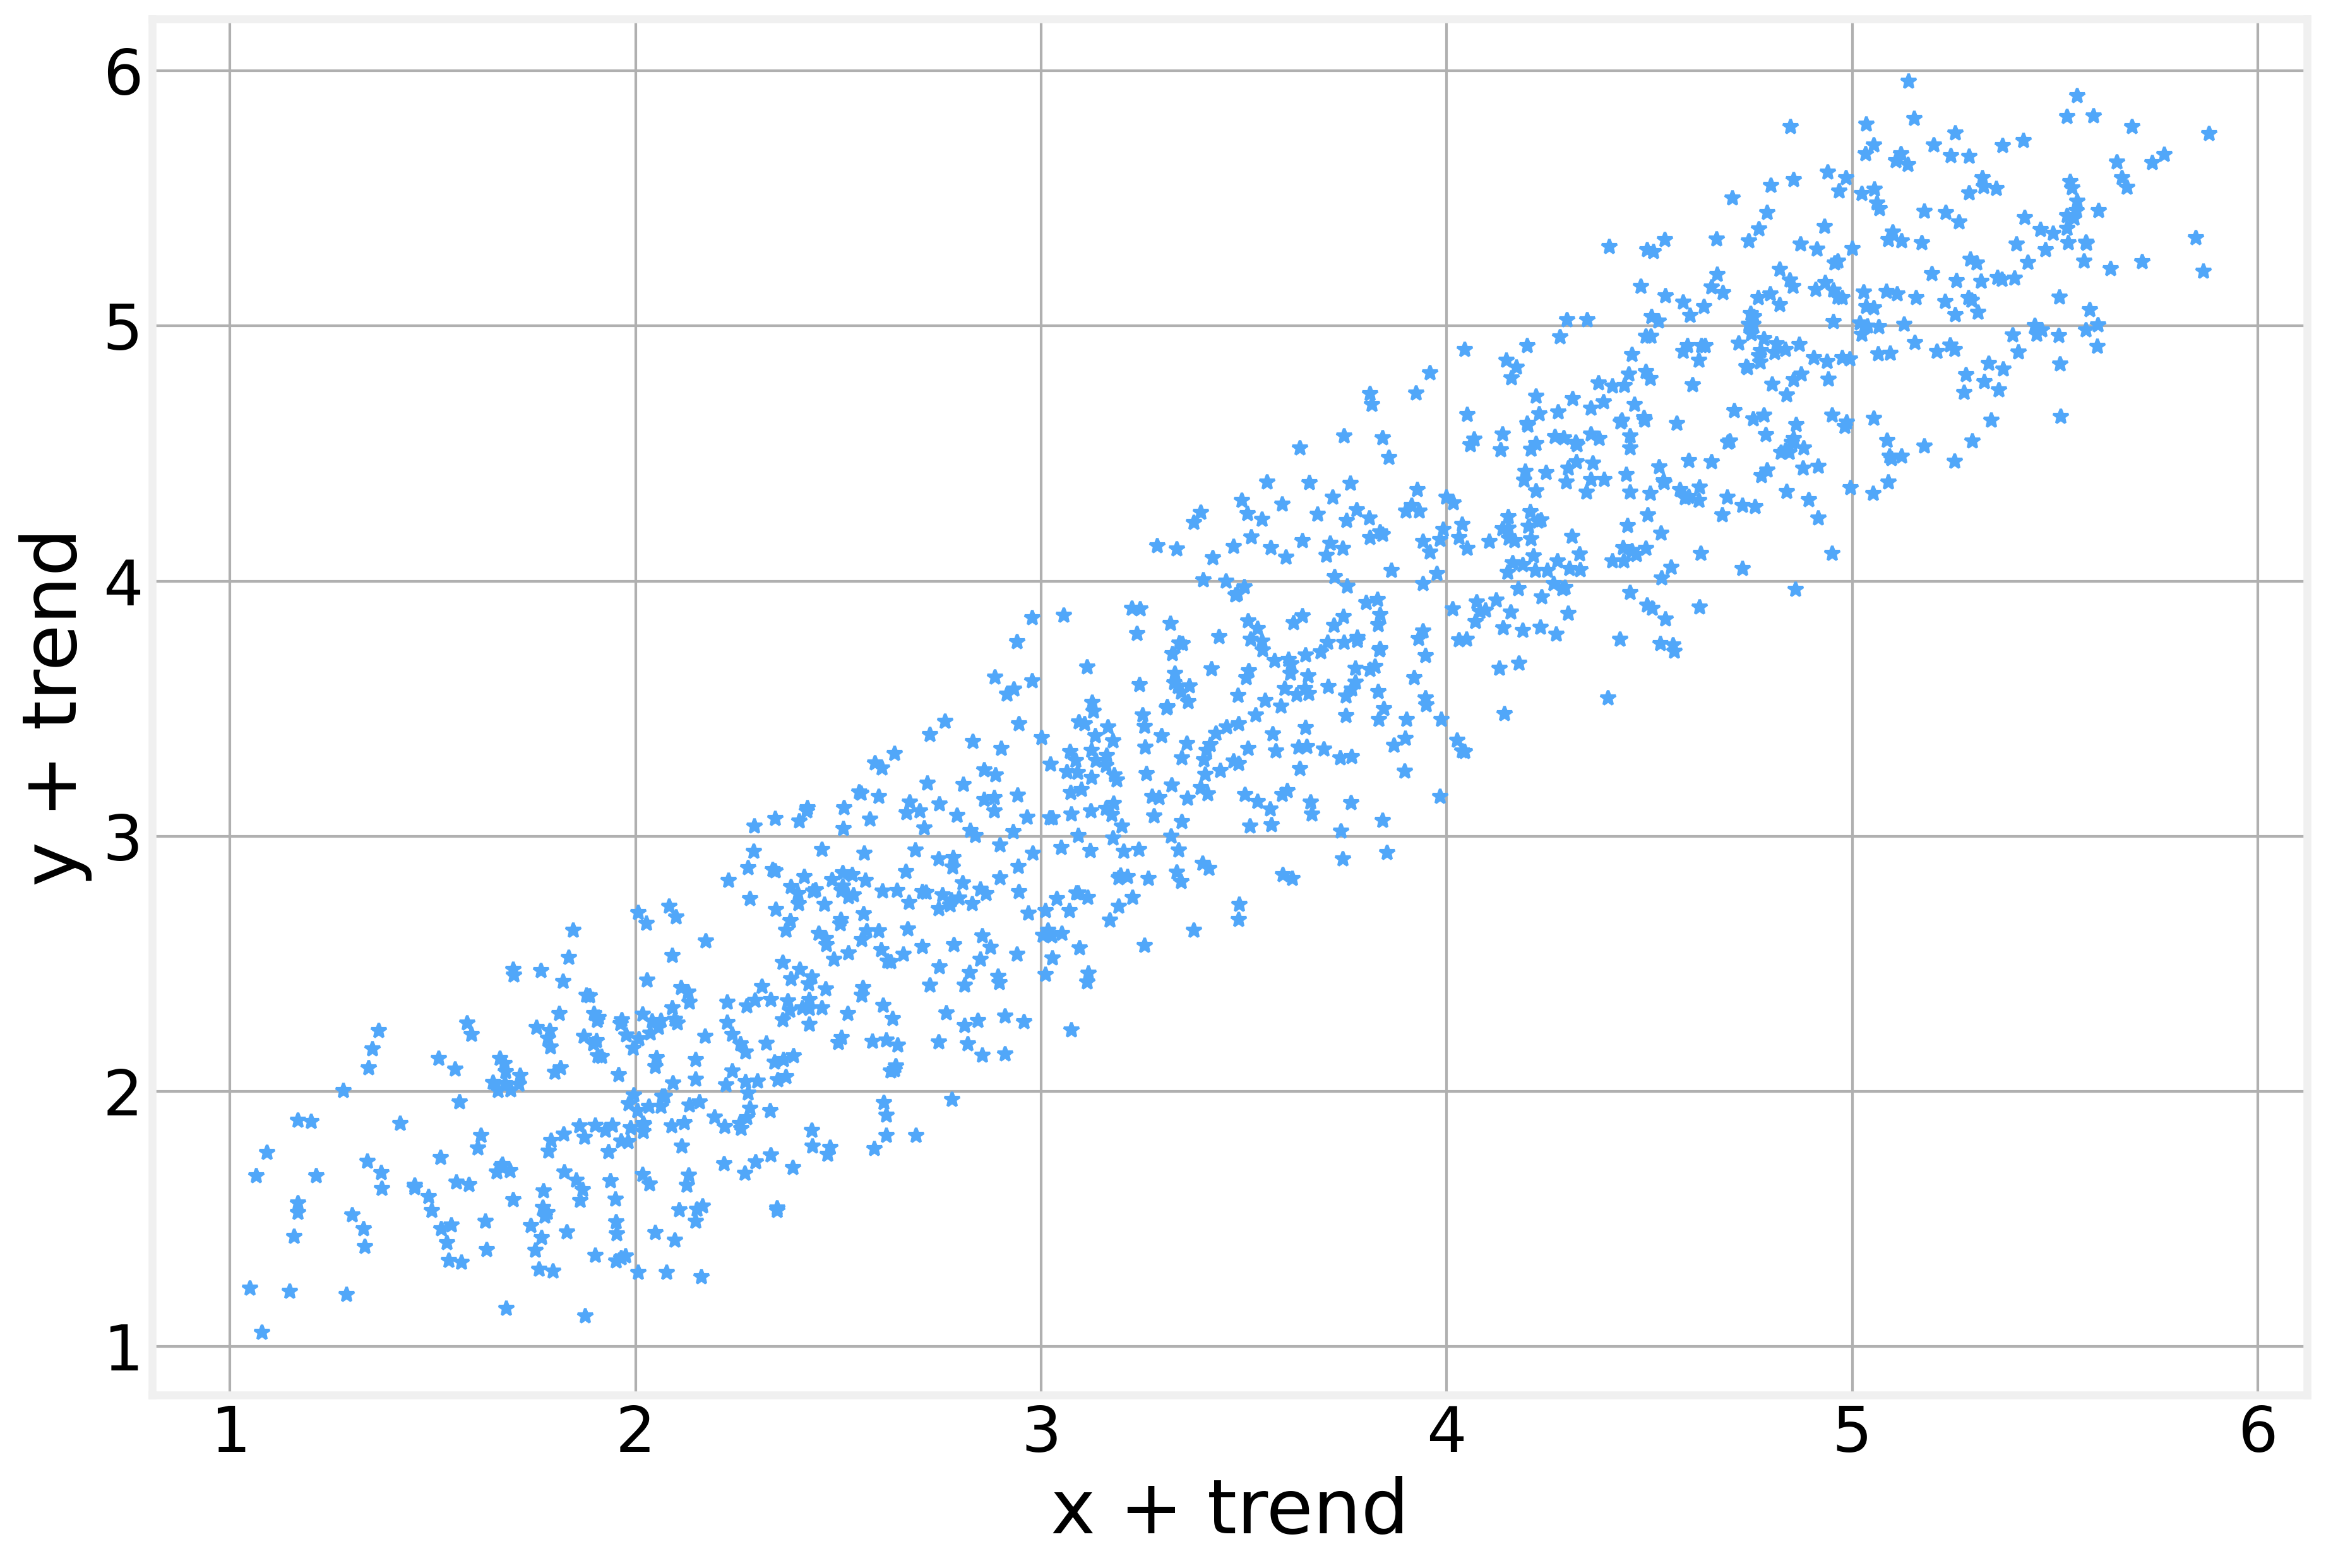

In [9]:
plt.plot(x+trend,y+trend,"*")
plt.xlabel("x + trend")
plt.ylabel("y + trend")

In [10]:
def acf (x,lag=40):
    return np.array([1]+[pearson(x[:-i],x[i:]) for i in range(1,lag) ])

Text(0, 0.5, 'ACF')

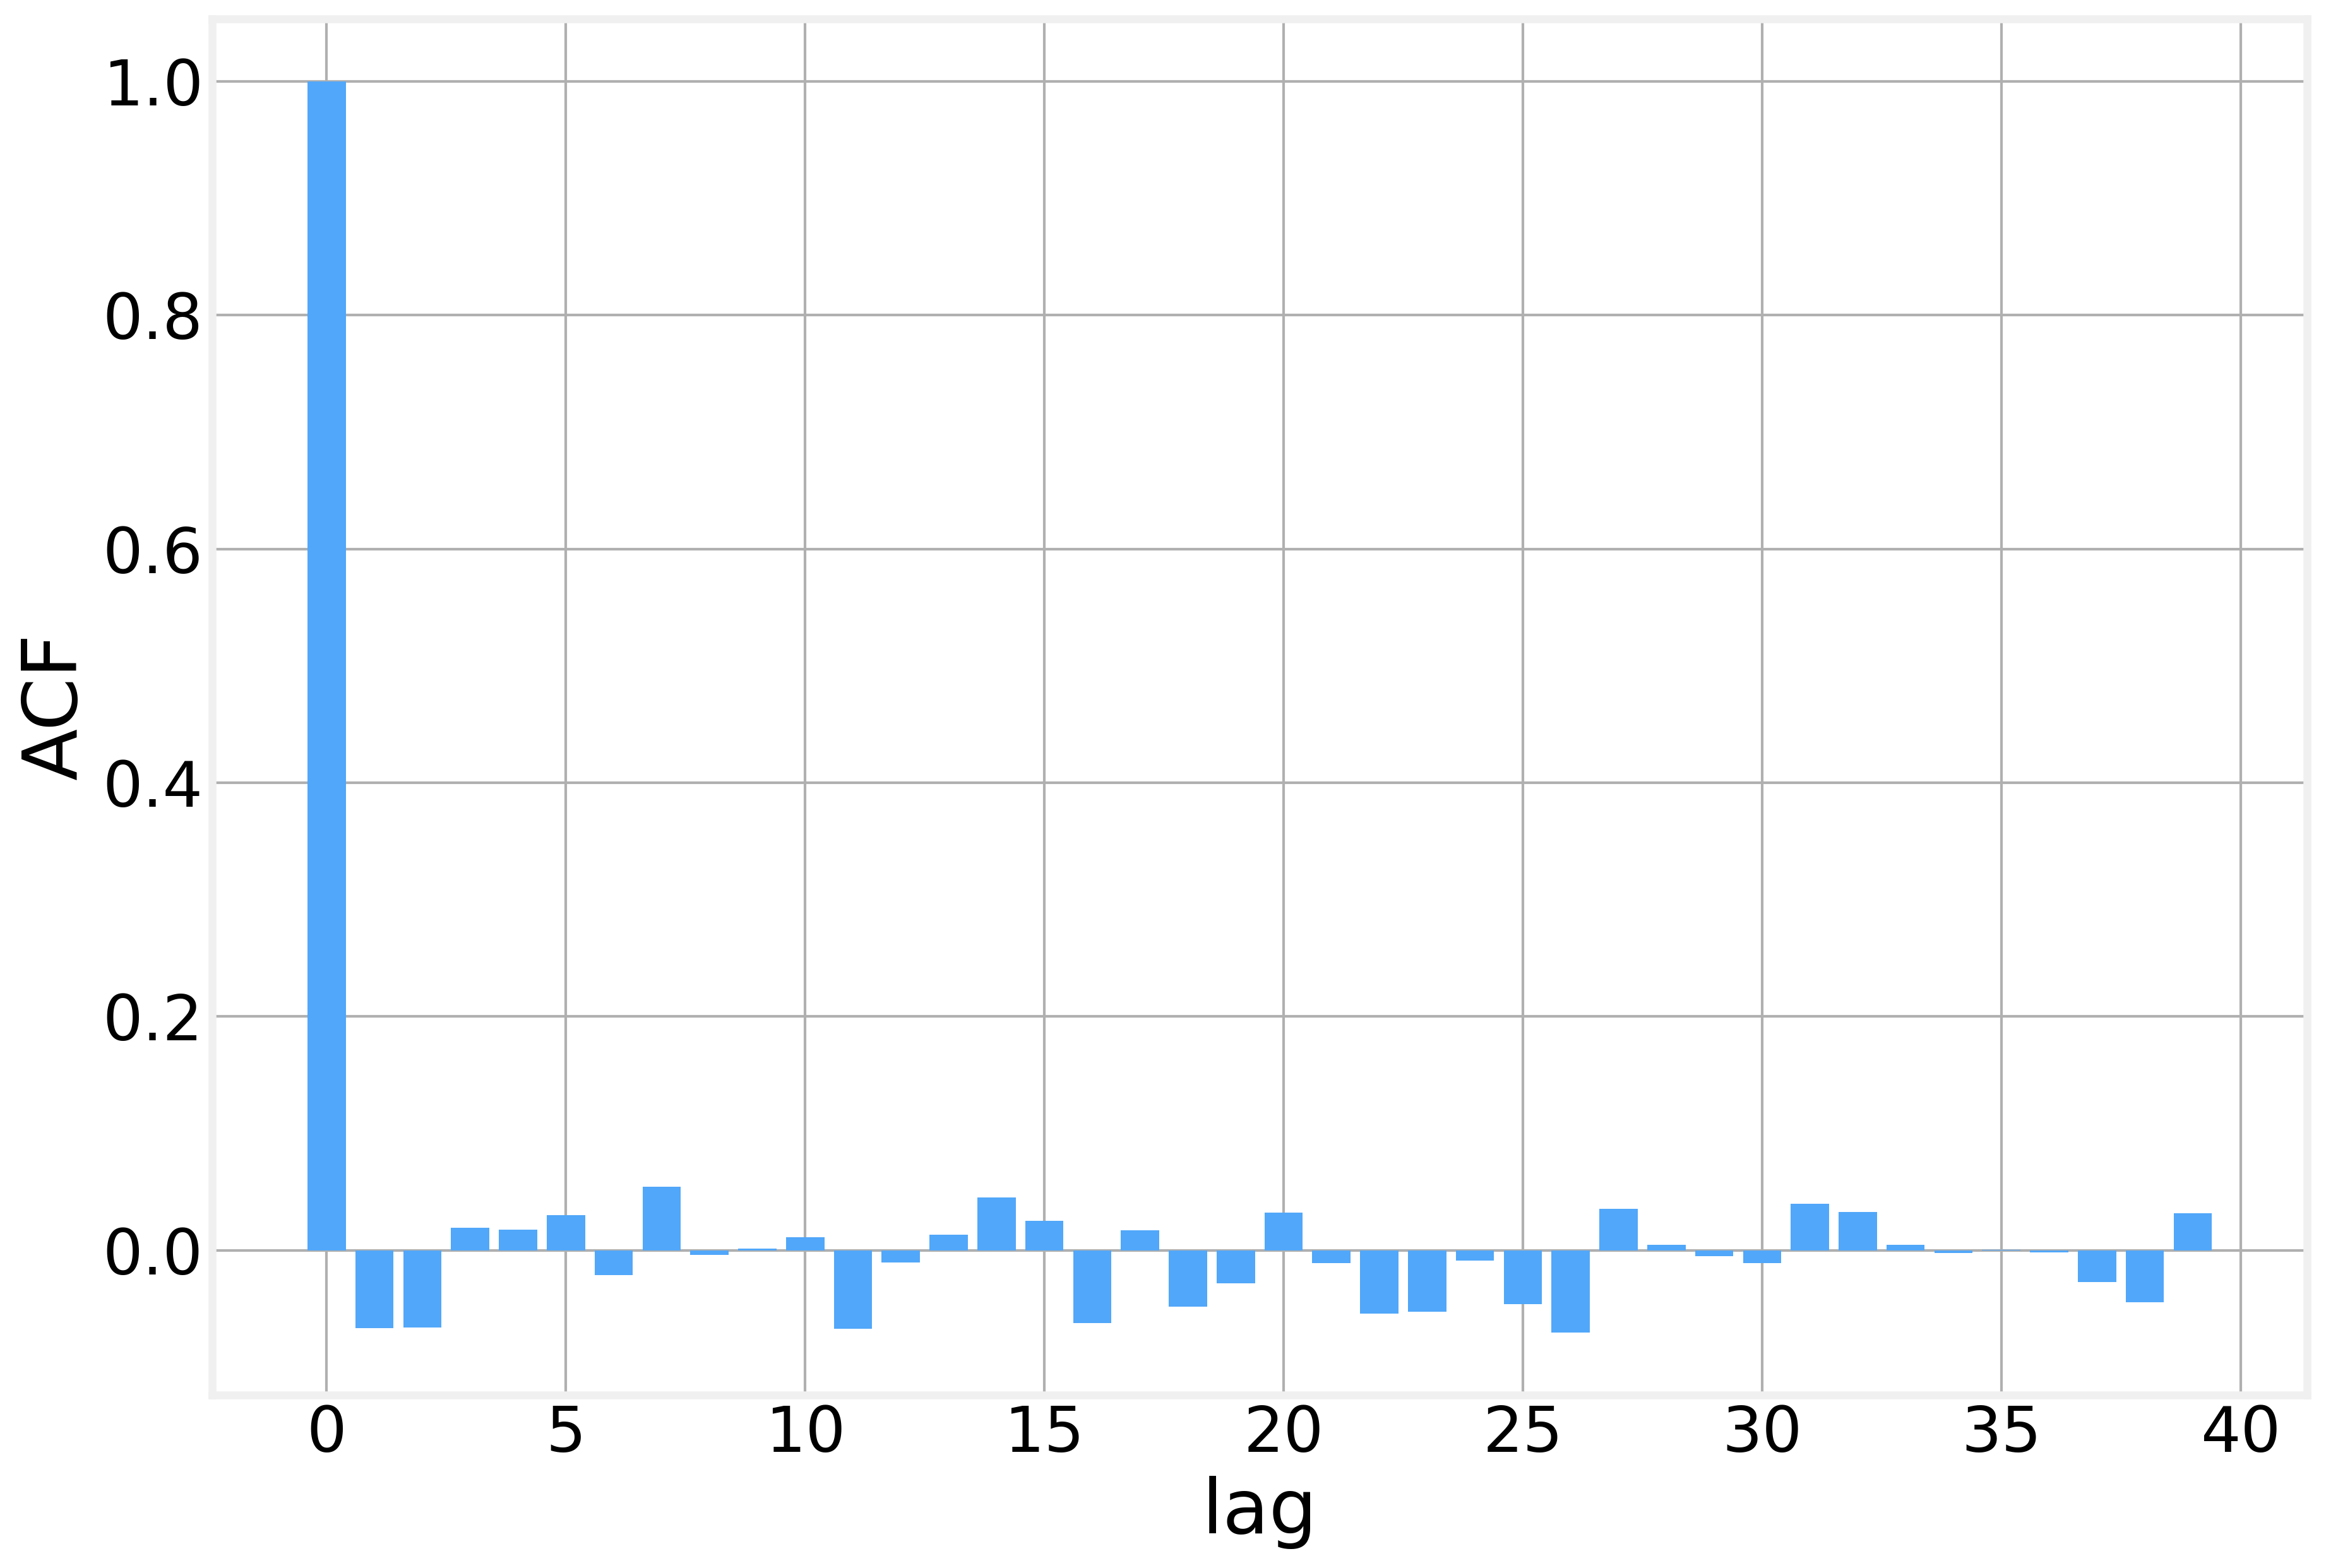

In [11]:
plt.bar(range(40),acf(x))
plt.xlabel("lag")
plt.ylabel("ACF")

In [12]:
def acf_ci(acfv,n,alpha=0.05):
    se=[1/np.sqrt(n)]
    se.extend(np.sqrt((1+2*np.cumsum(np.power(acfv[1:-1],2)))/n))
    se=np.array(se)

    se*=stats.norm.ppf(1-alpha/2.)
    return se

In [13]:
def plot_acf(x,lag=40,alpha=0.05):
    acf_val=acf(x,lag)

    plt.vlines(range(lag),0,acf_val)
    plt.scatter(np.arange(lag),acf_val,marker="*")
    plt.xlabel("lag")
    plt.ylabel("ACF")

    ci=acf_ci(acf_val,len(x),alpha)
    plt.fill_between(np.arange(1,ci.shape[0]+1),-ci,ci,alpha=0.25)

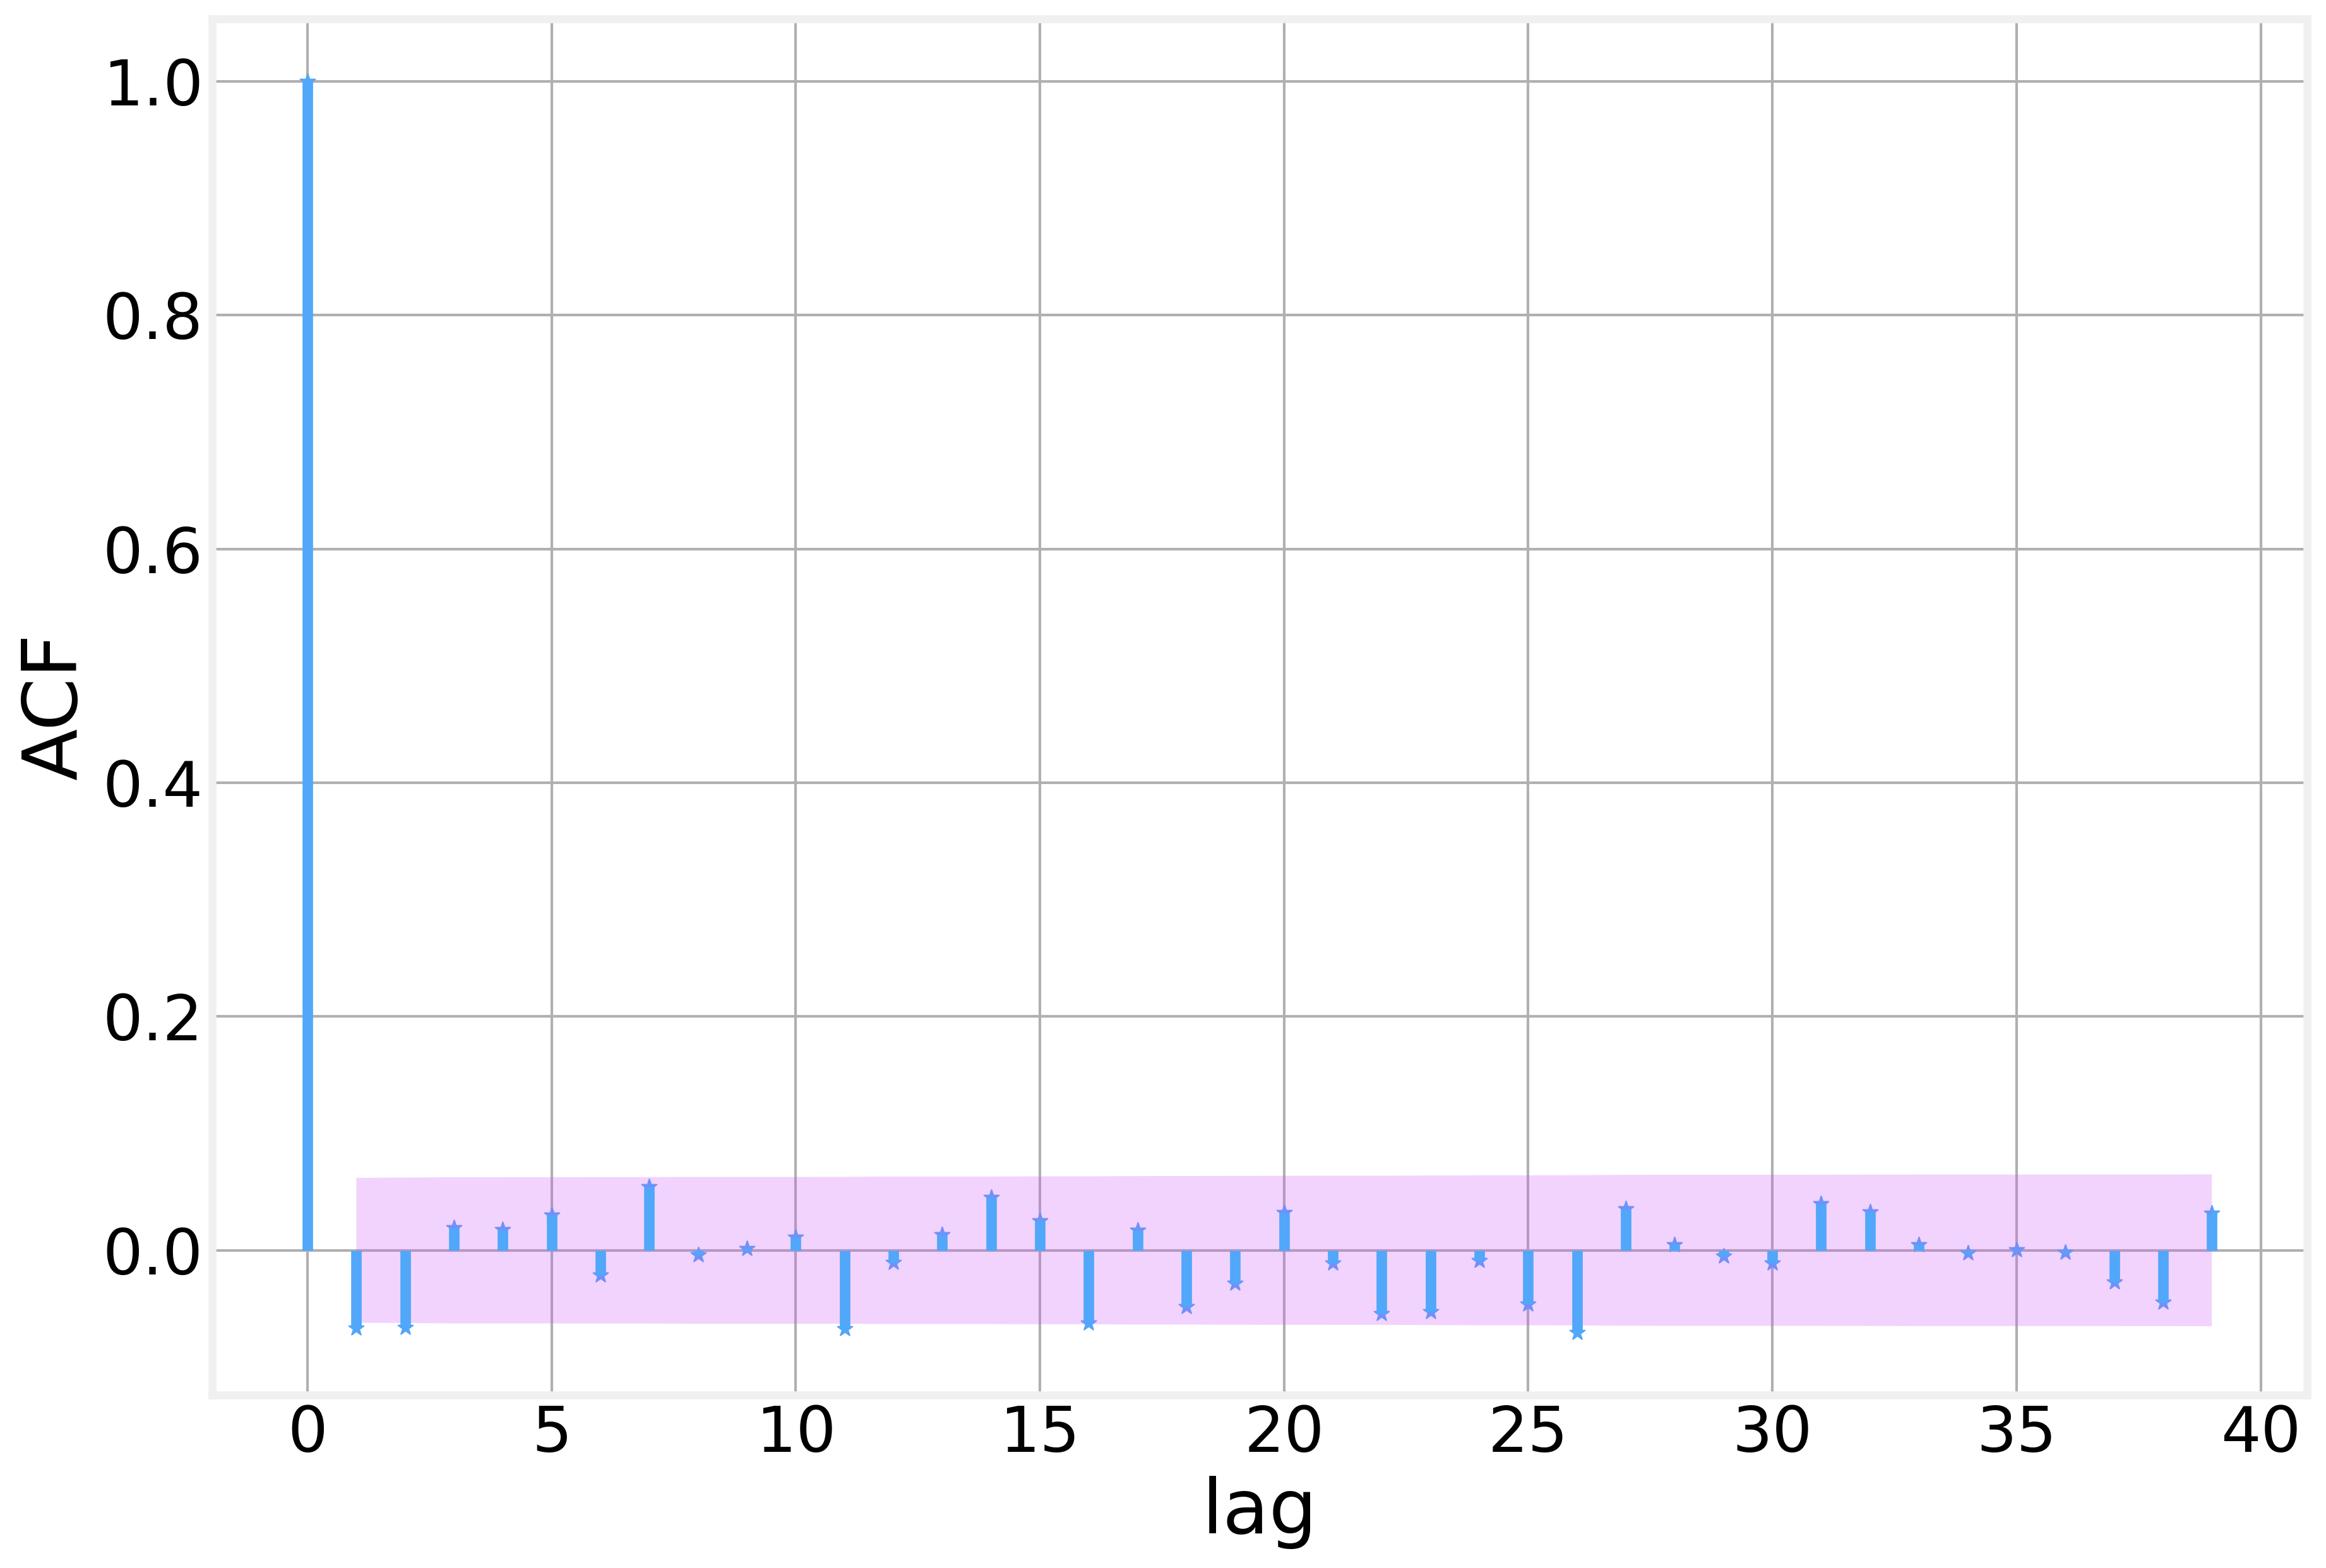

In [14]:
plot_acf(x)

In [15]:
gdp=pd.read_csv('data/GDP.csv',parse_dates=["DATE"])
gdp.set_index("DATE",inplace=True)


Text(0, 0.5, 'GDP($\\$B$)')

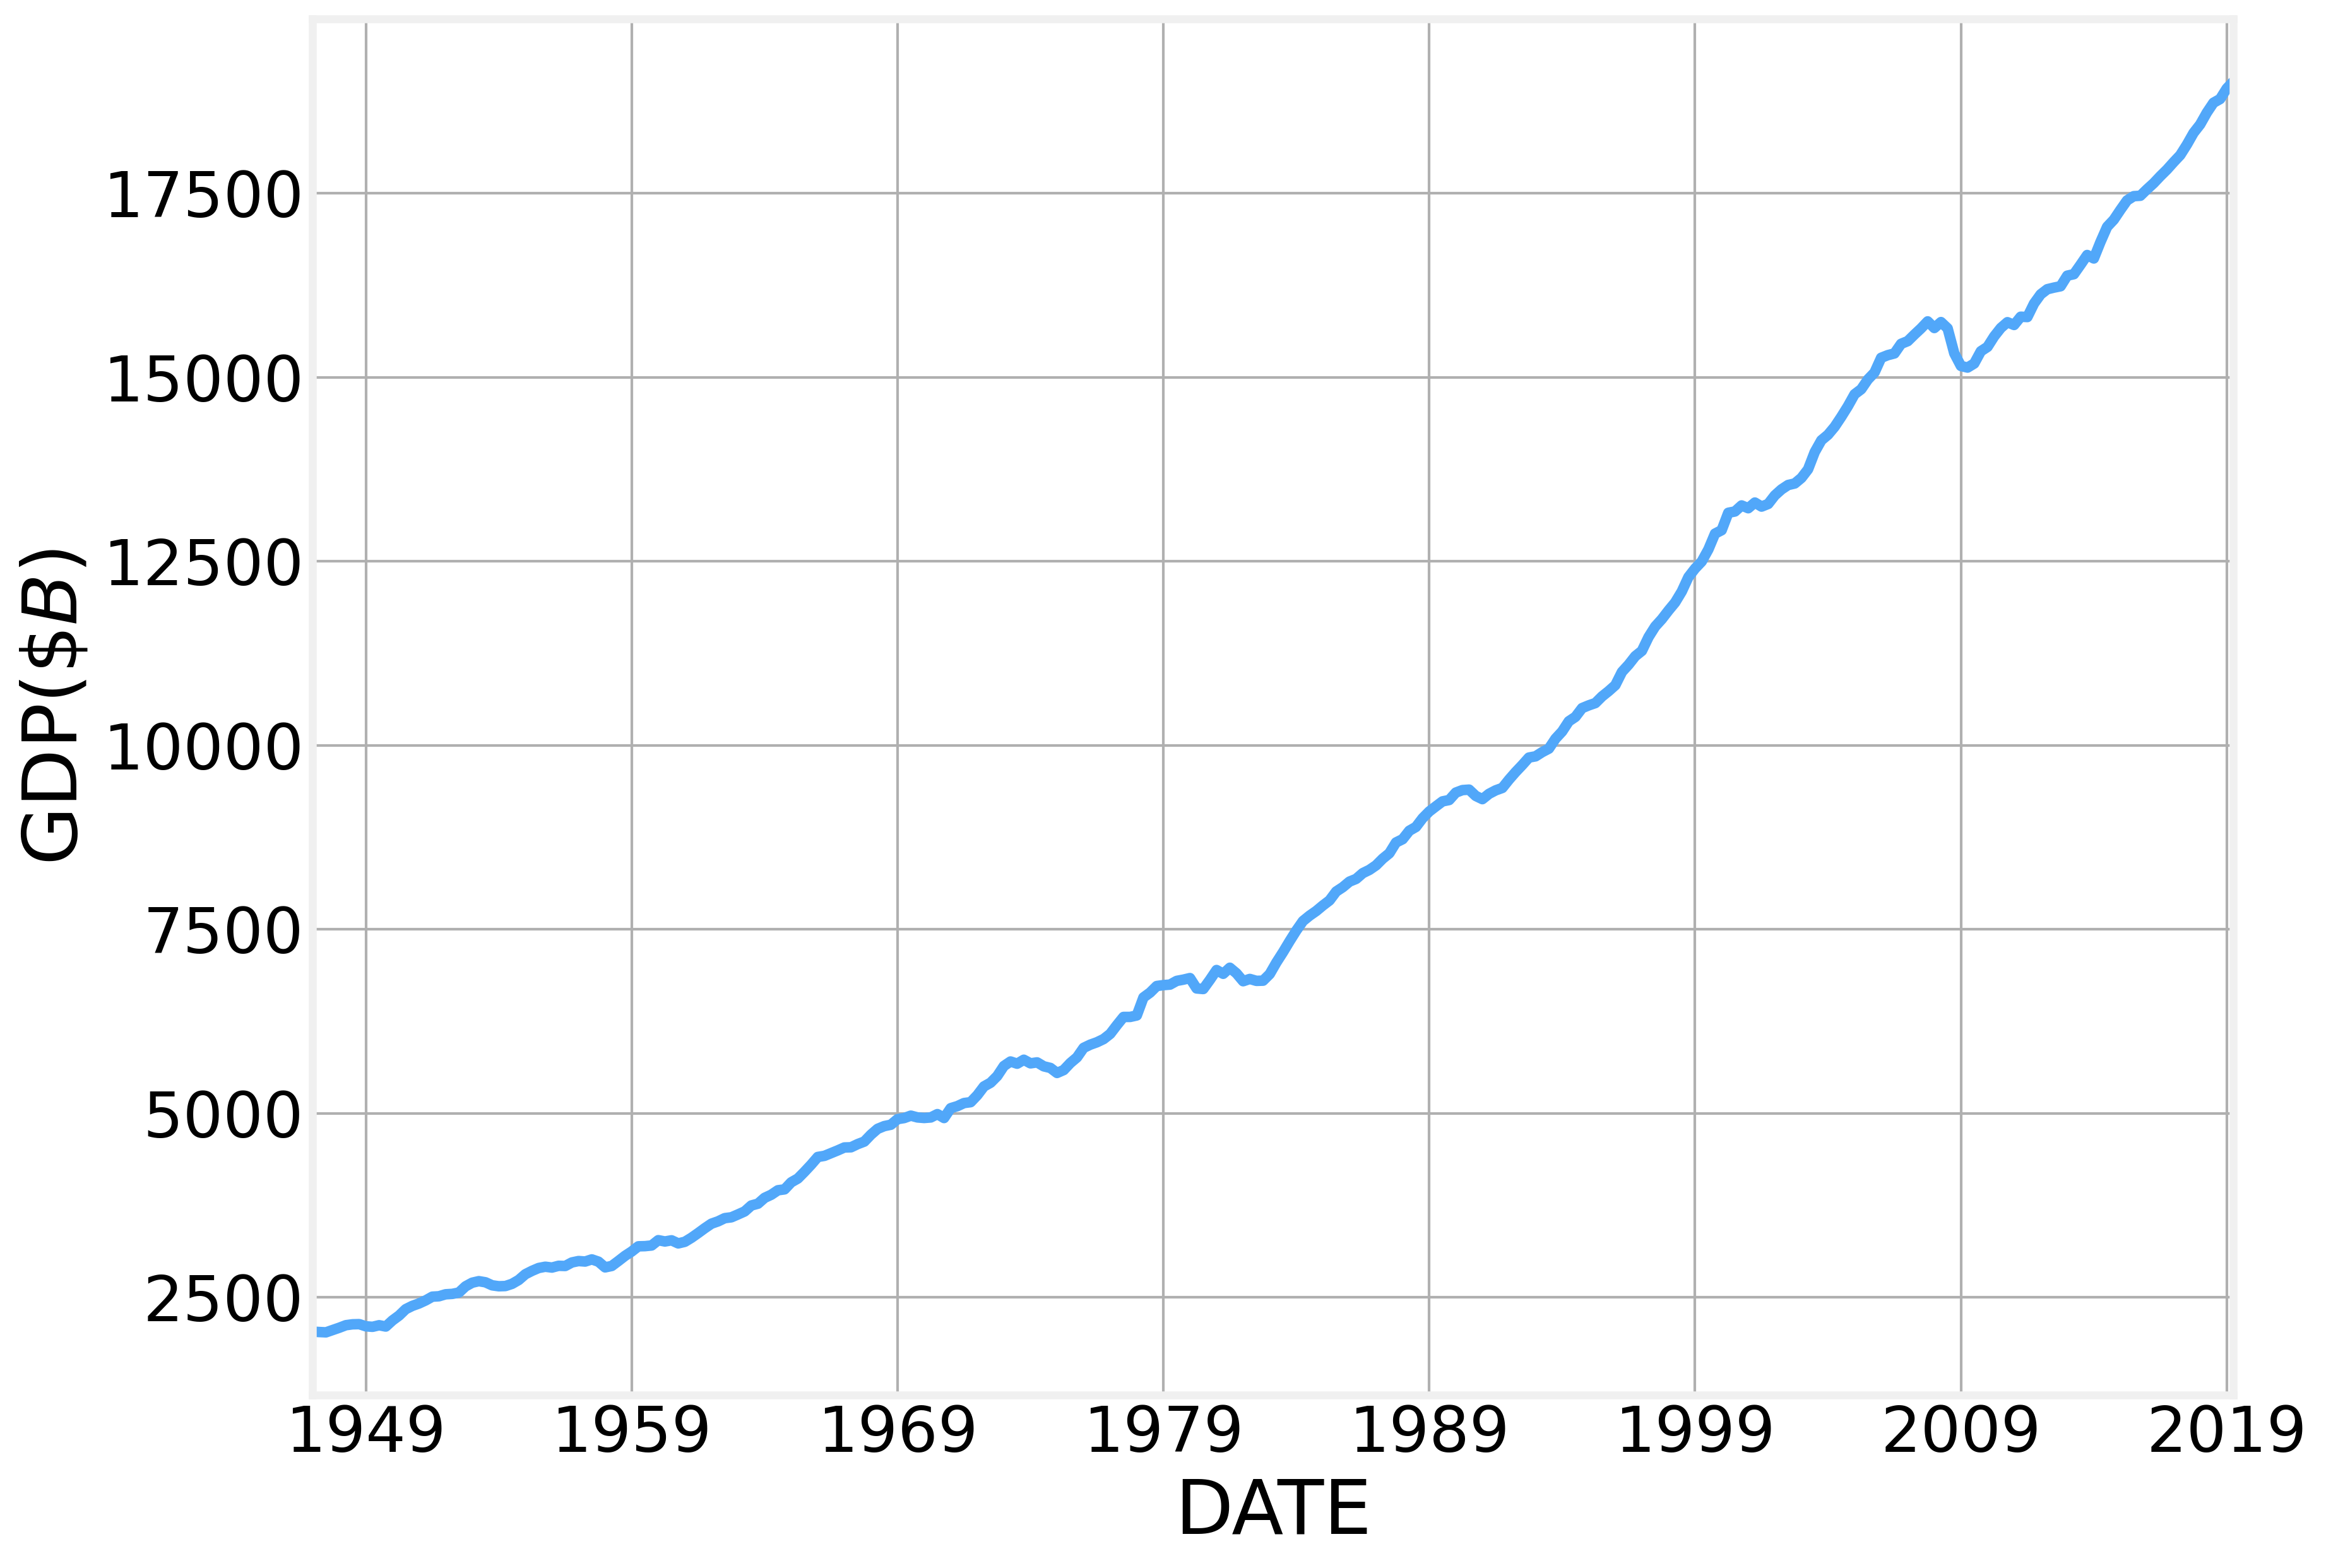

In [16]:
gdp.plot(legend=False)
plt.gca().set_ylabel(r'GDP($\$B$)')

In [17]:
values=gdp['GDP'].values
detrended = values[1:]-values[:-1]

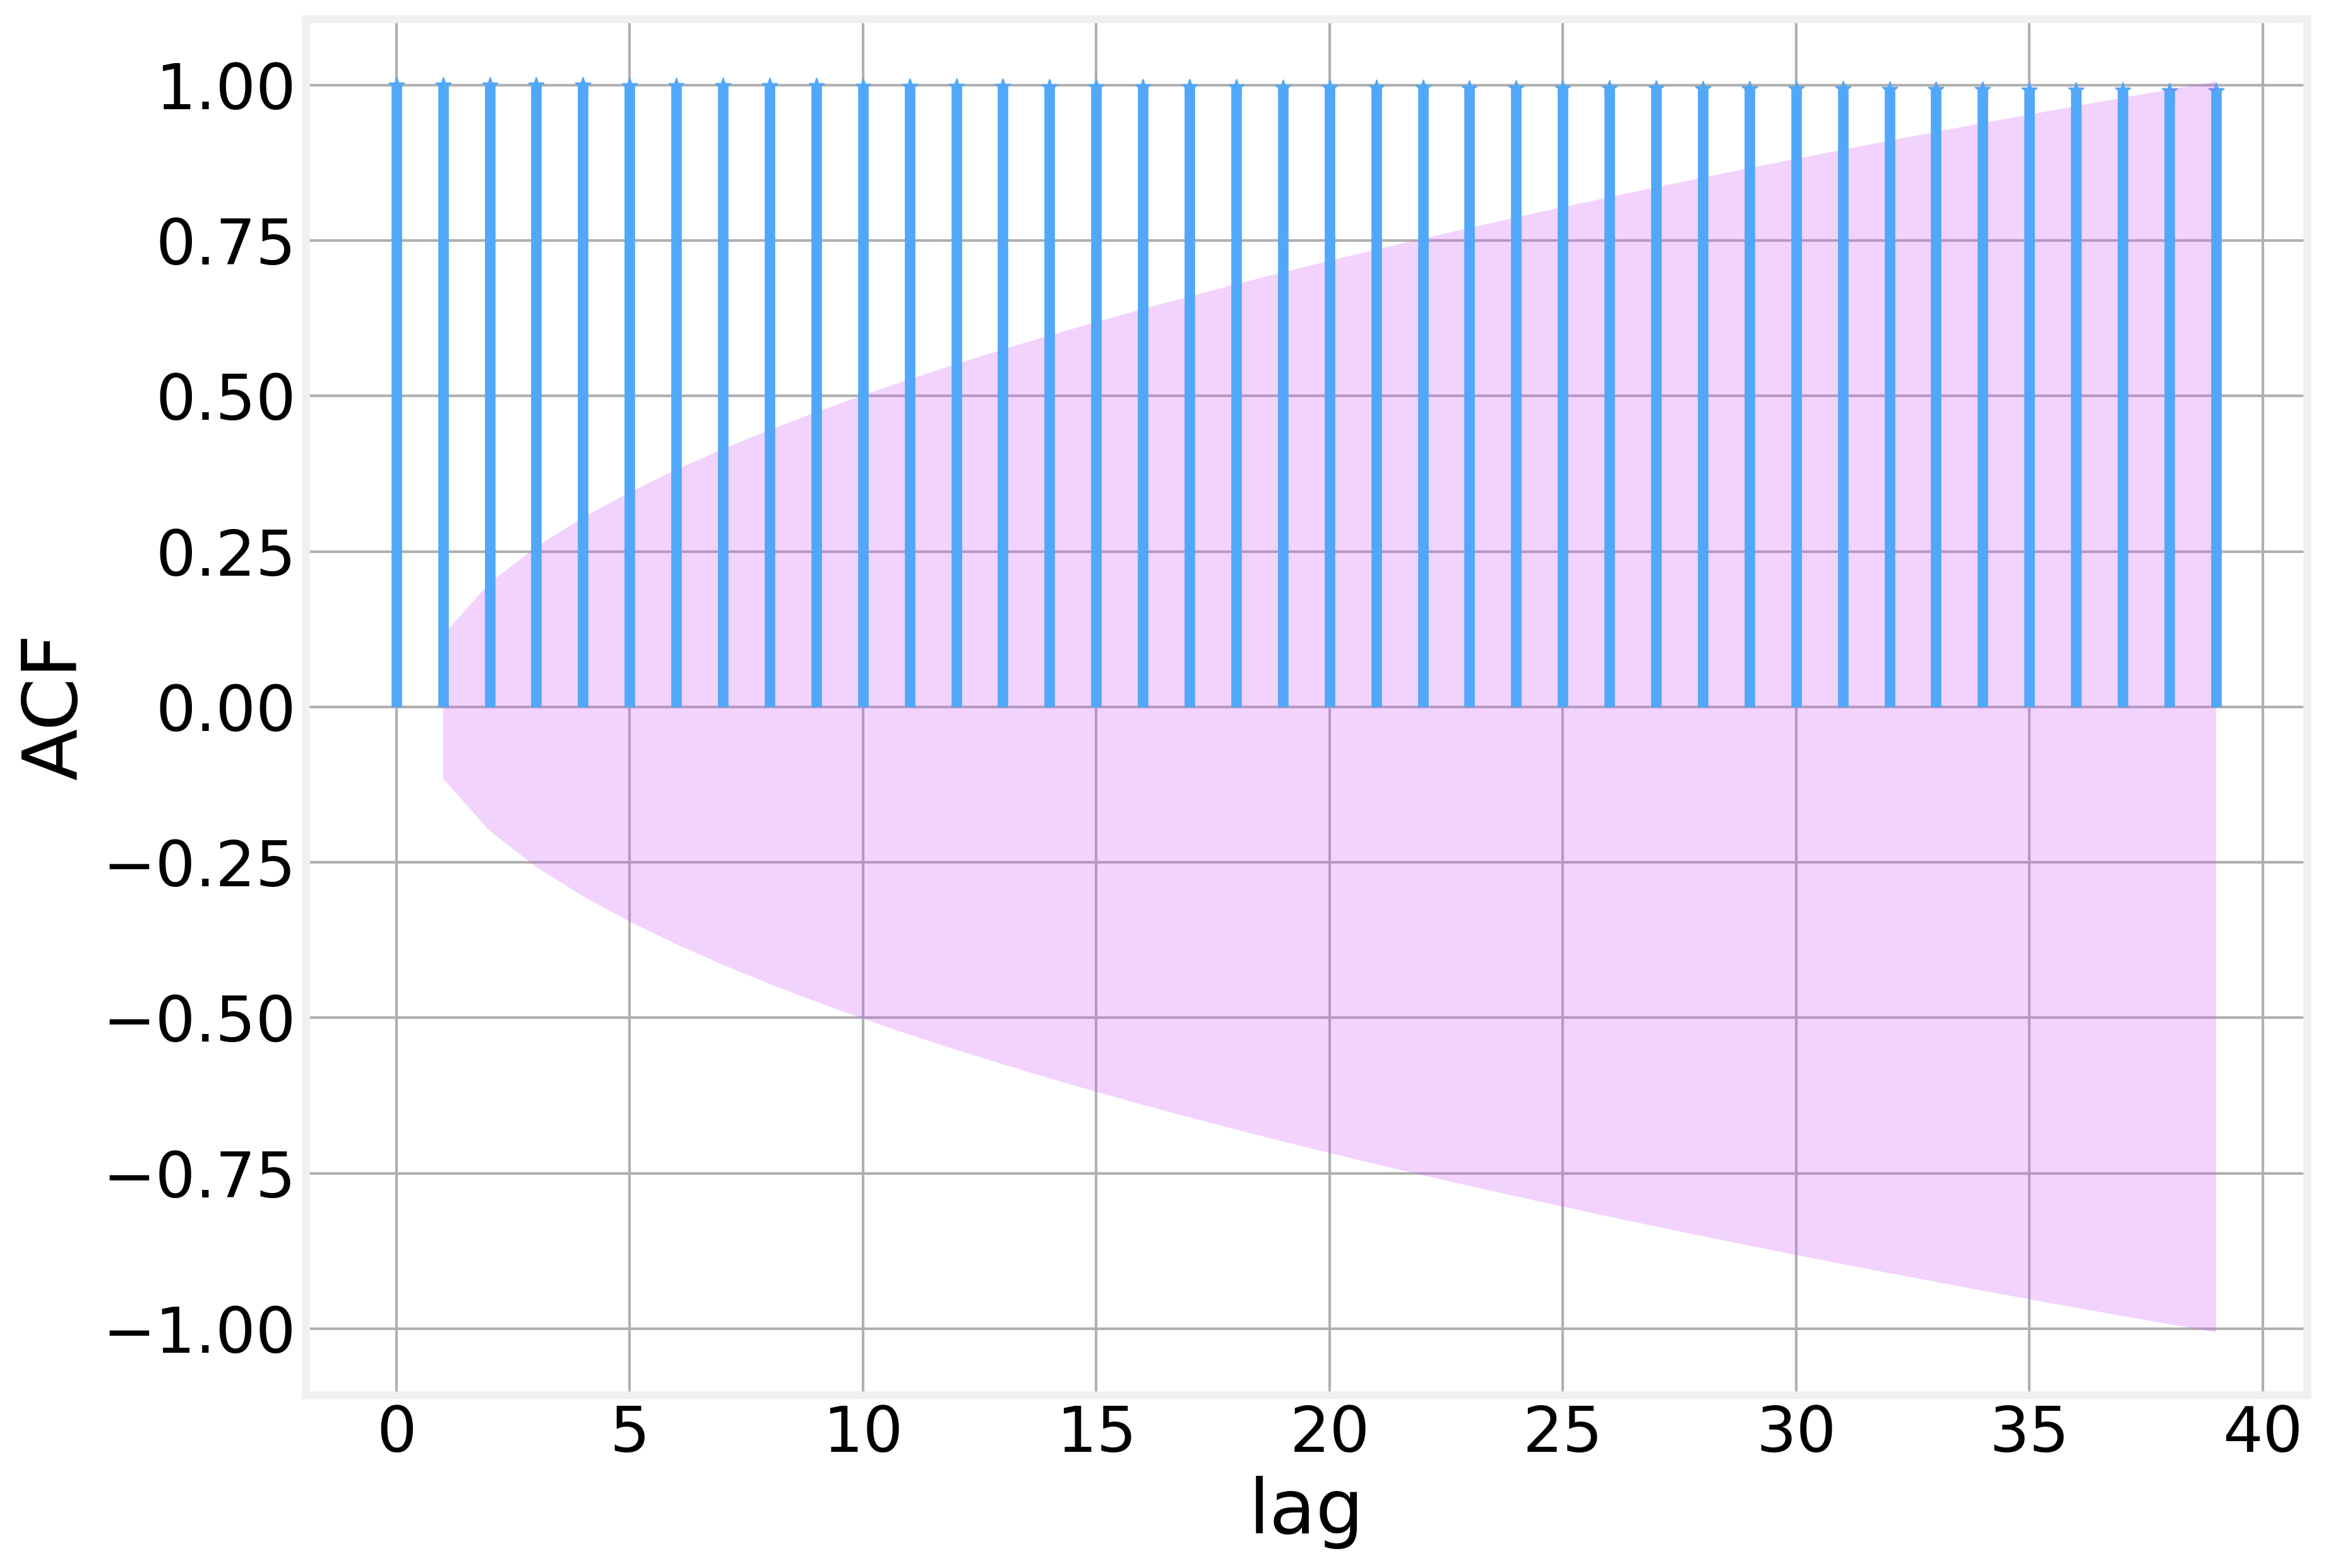

In [18]:
plot_acf(values)

Text(0, 0.5, 'QoQ Change ($\\$B$)')

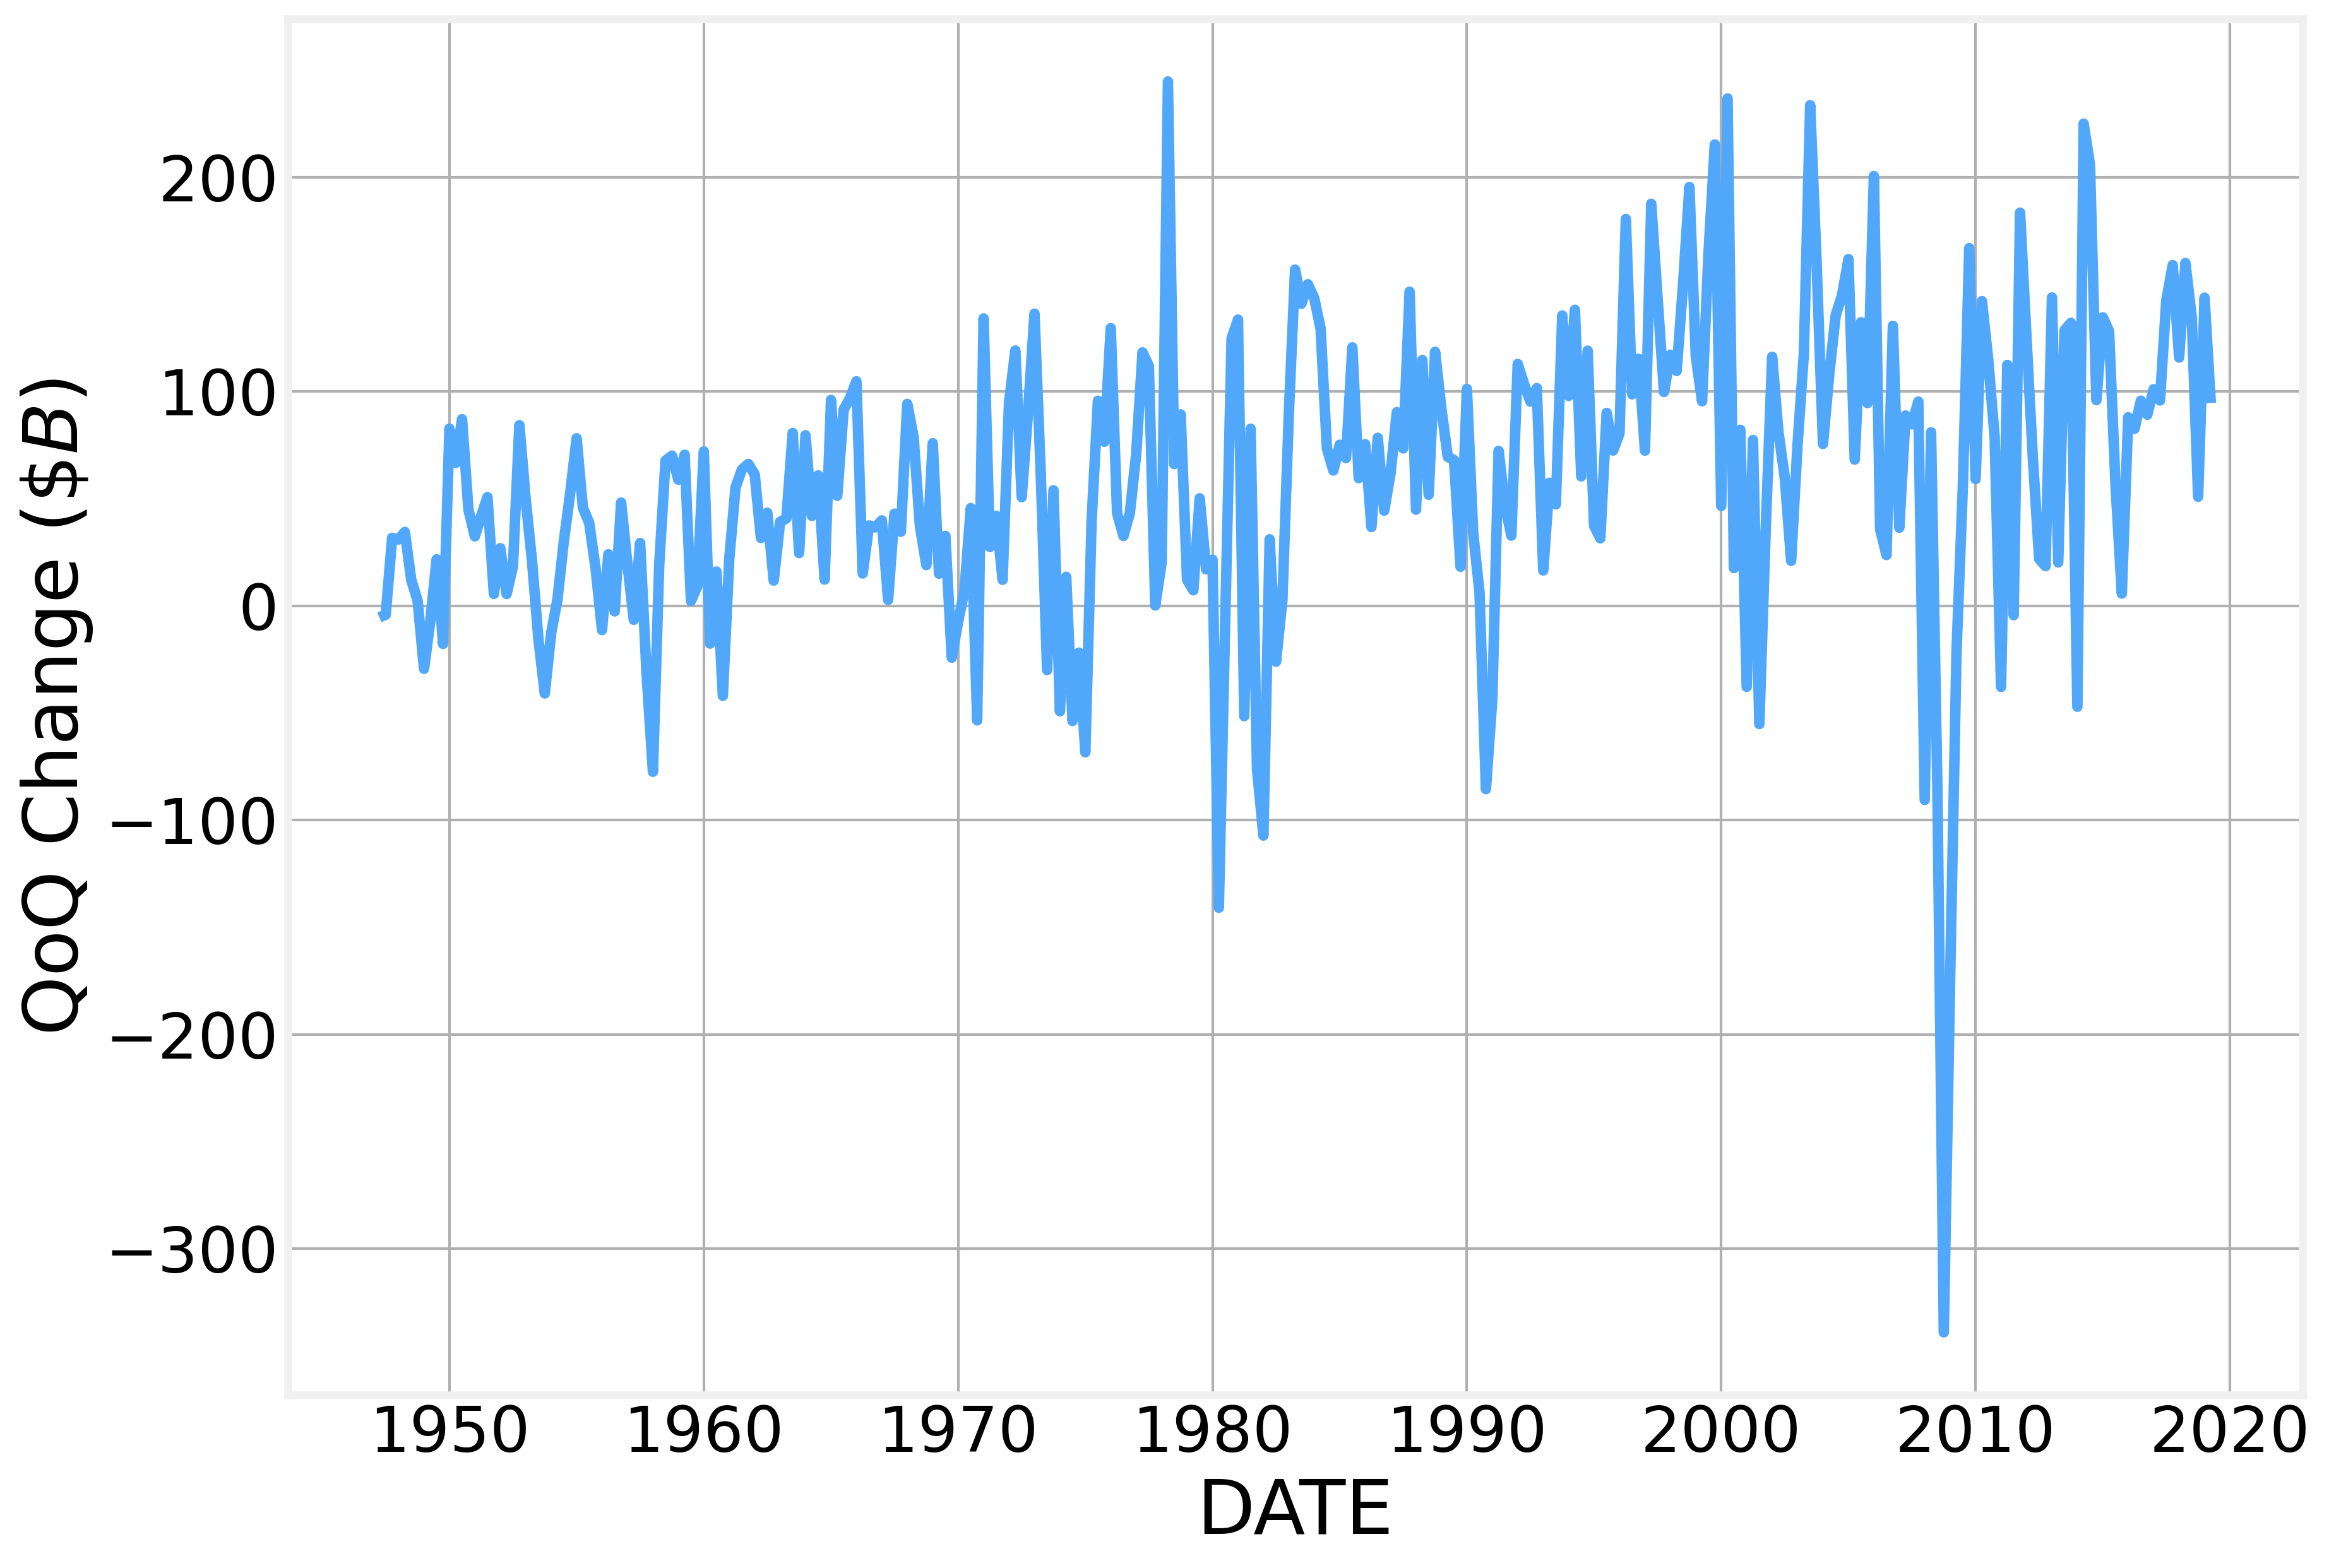

In [19]:
plt.plot(gdp.index[1:],detrended)
plt.xlabel("DATE")
plt.ylabel(r'QoQ Change ($\$B$)')

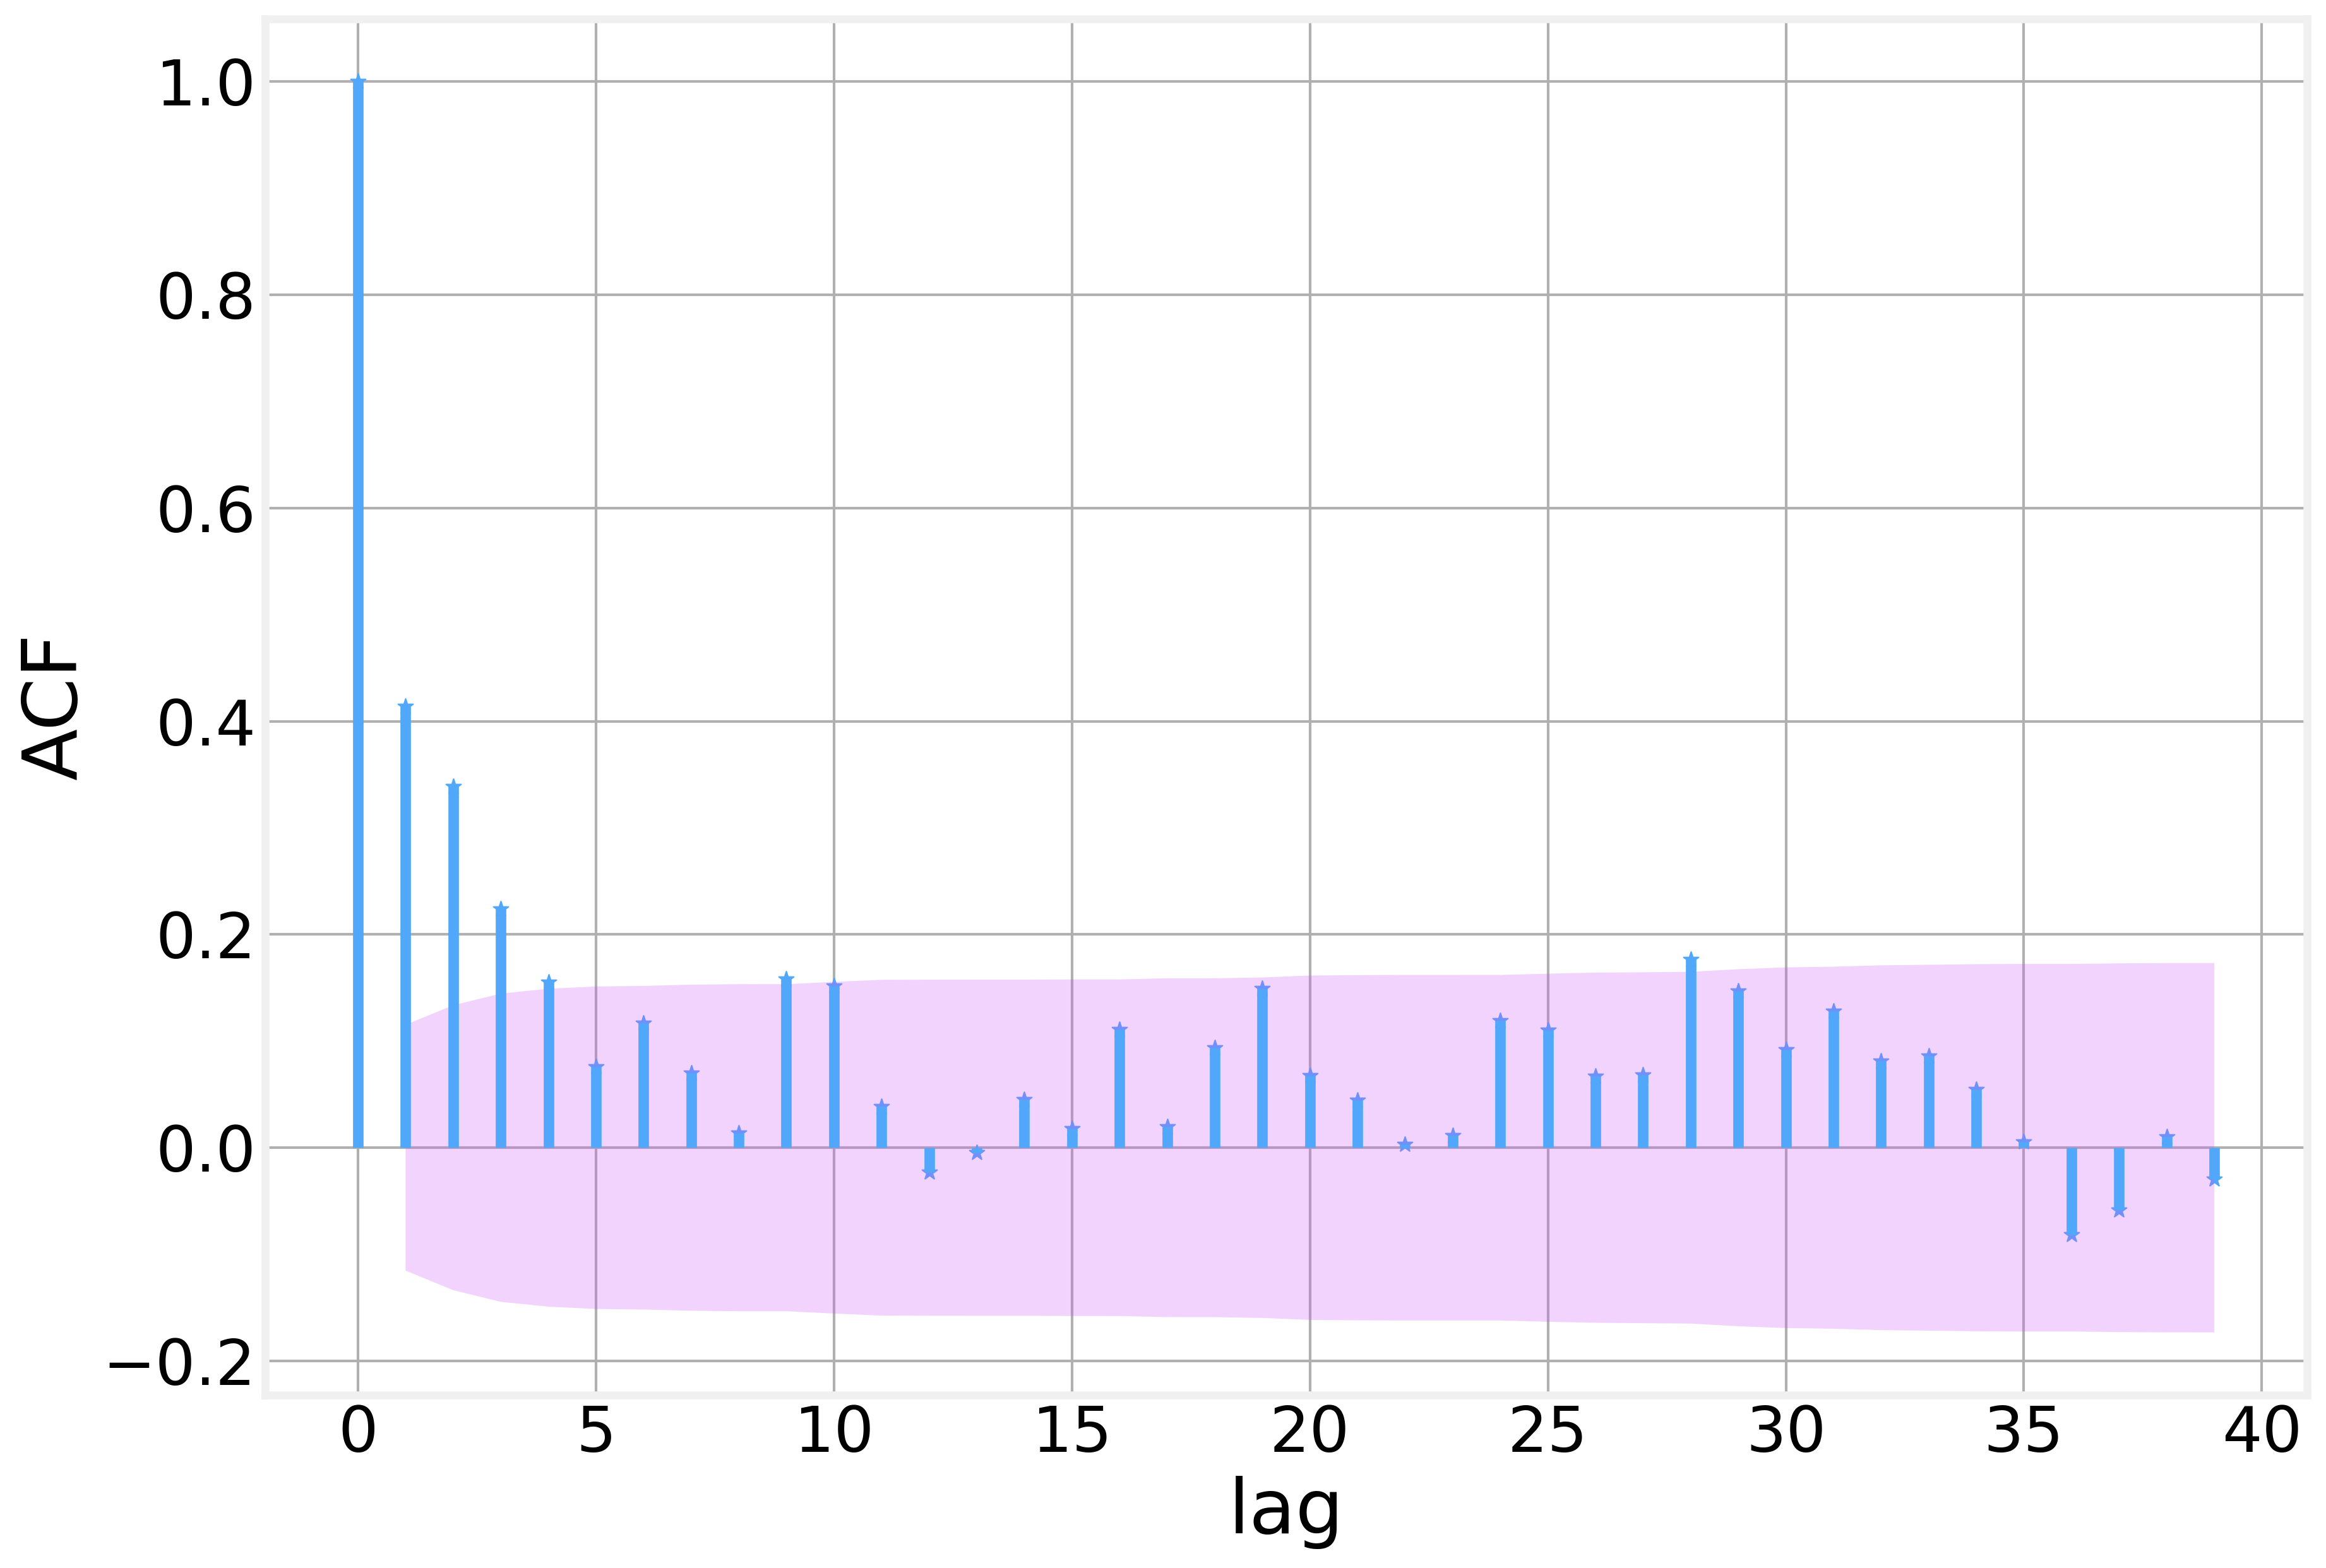

In [20]:
plot_acf(detrended)

In [21]:
def rolling(x,order):
    npoints=x.shape[0]
    running=[]

    for i in range(npoints-order+1):
        running.append(x[i:i+order])
    return np.array(running)

In [22]:
def pacf (x,lag=40):
    y=[]

    for i in range(3,lag+2):
        windows=rolling(x,i)

        xt=windows[:,-1]
        xt_l=windows[:,0]
        inter=windows[:,1:-1]

        lm=LinearRegression(fit_intercept=False).fit(inter,xt)
        xt_fit=lm.predict(inter)

        lm=LinearRegression(fit_intercept=False).fit(inter,xt_l)
        xt_l_fit=lm.predict(inter)

        y.append(pearson(xt-xt_fit,xt_l-xt_l_fit))
    pacf_l=acf(x,2)[1]
    return np.array([1,pacf_l]+y)

In [23]:
def plot_pacf(x,alpha=0.05,lag=40):
    pacf_val=pacf(x,lag)
    plt.vlines(np.arange(lag+1),0,pacf_val)
    plt.scatter(np.arange(lag+1),pacf_val,marker="o")

    plt.xlabel("lag")
    plt.ylabel("PACF")

    ci=acf_ci(pacf_val,len(x))
    plt.fill_between(np.arange(1,ci.shape[0]+1),-ci,ci,alpha=0.25)

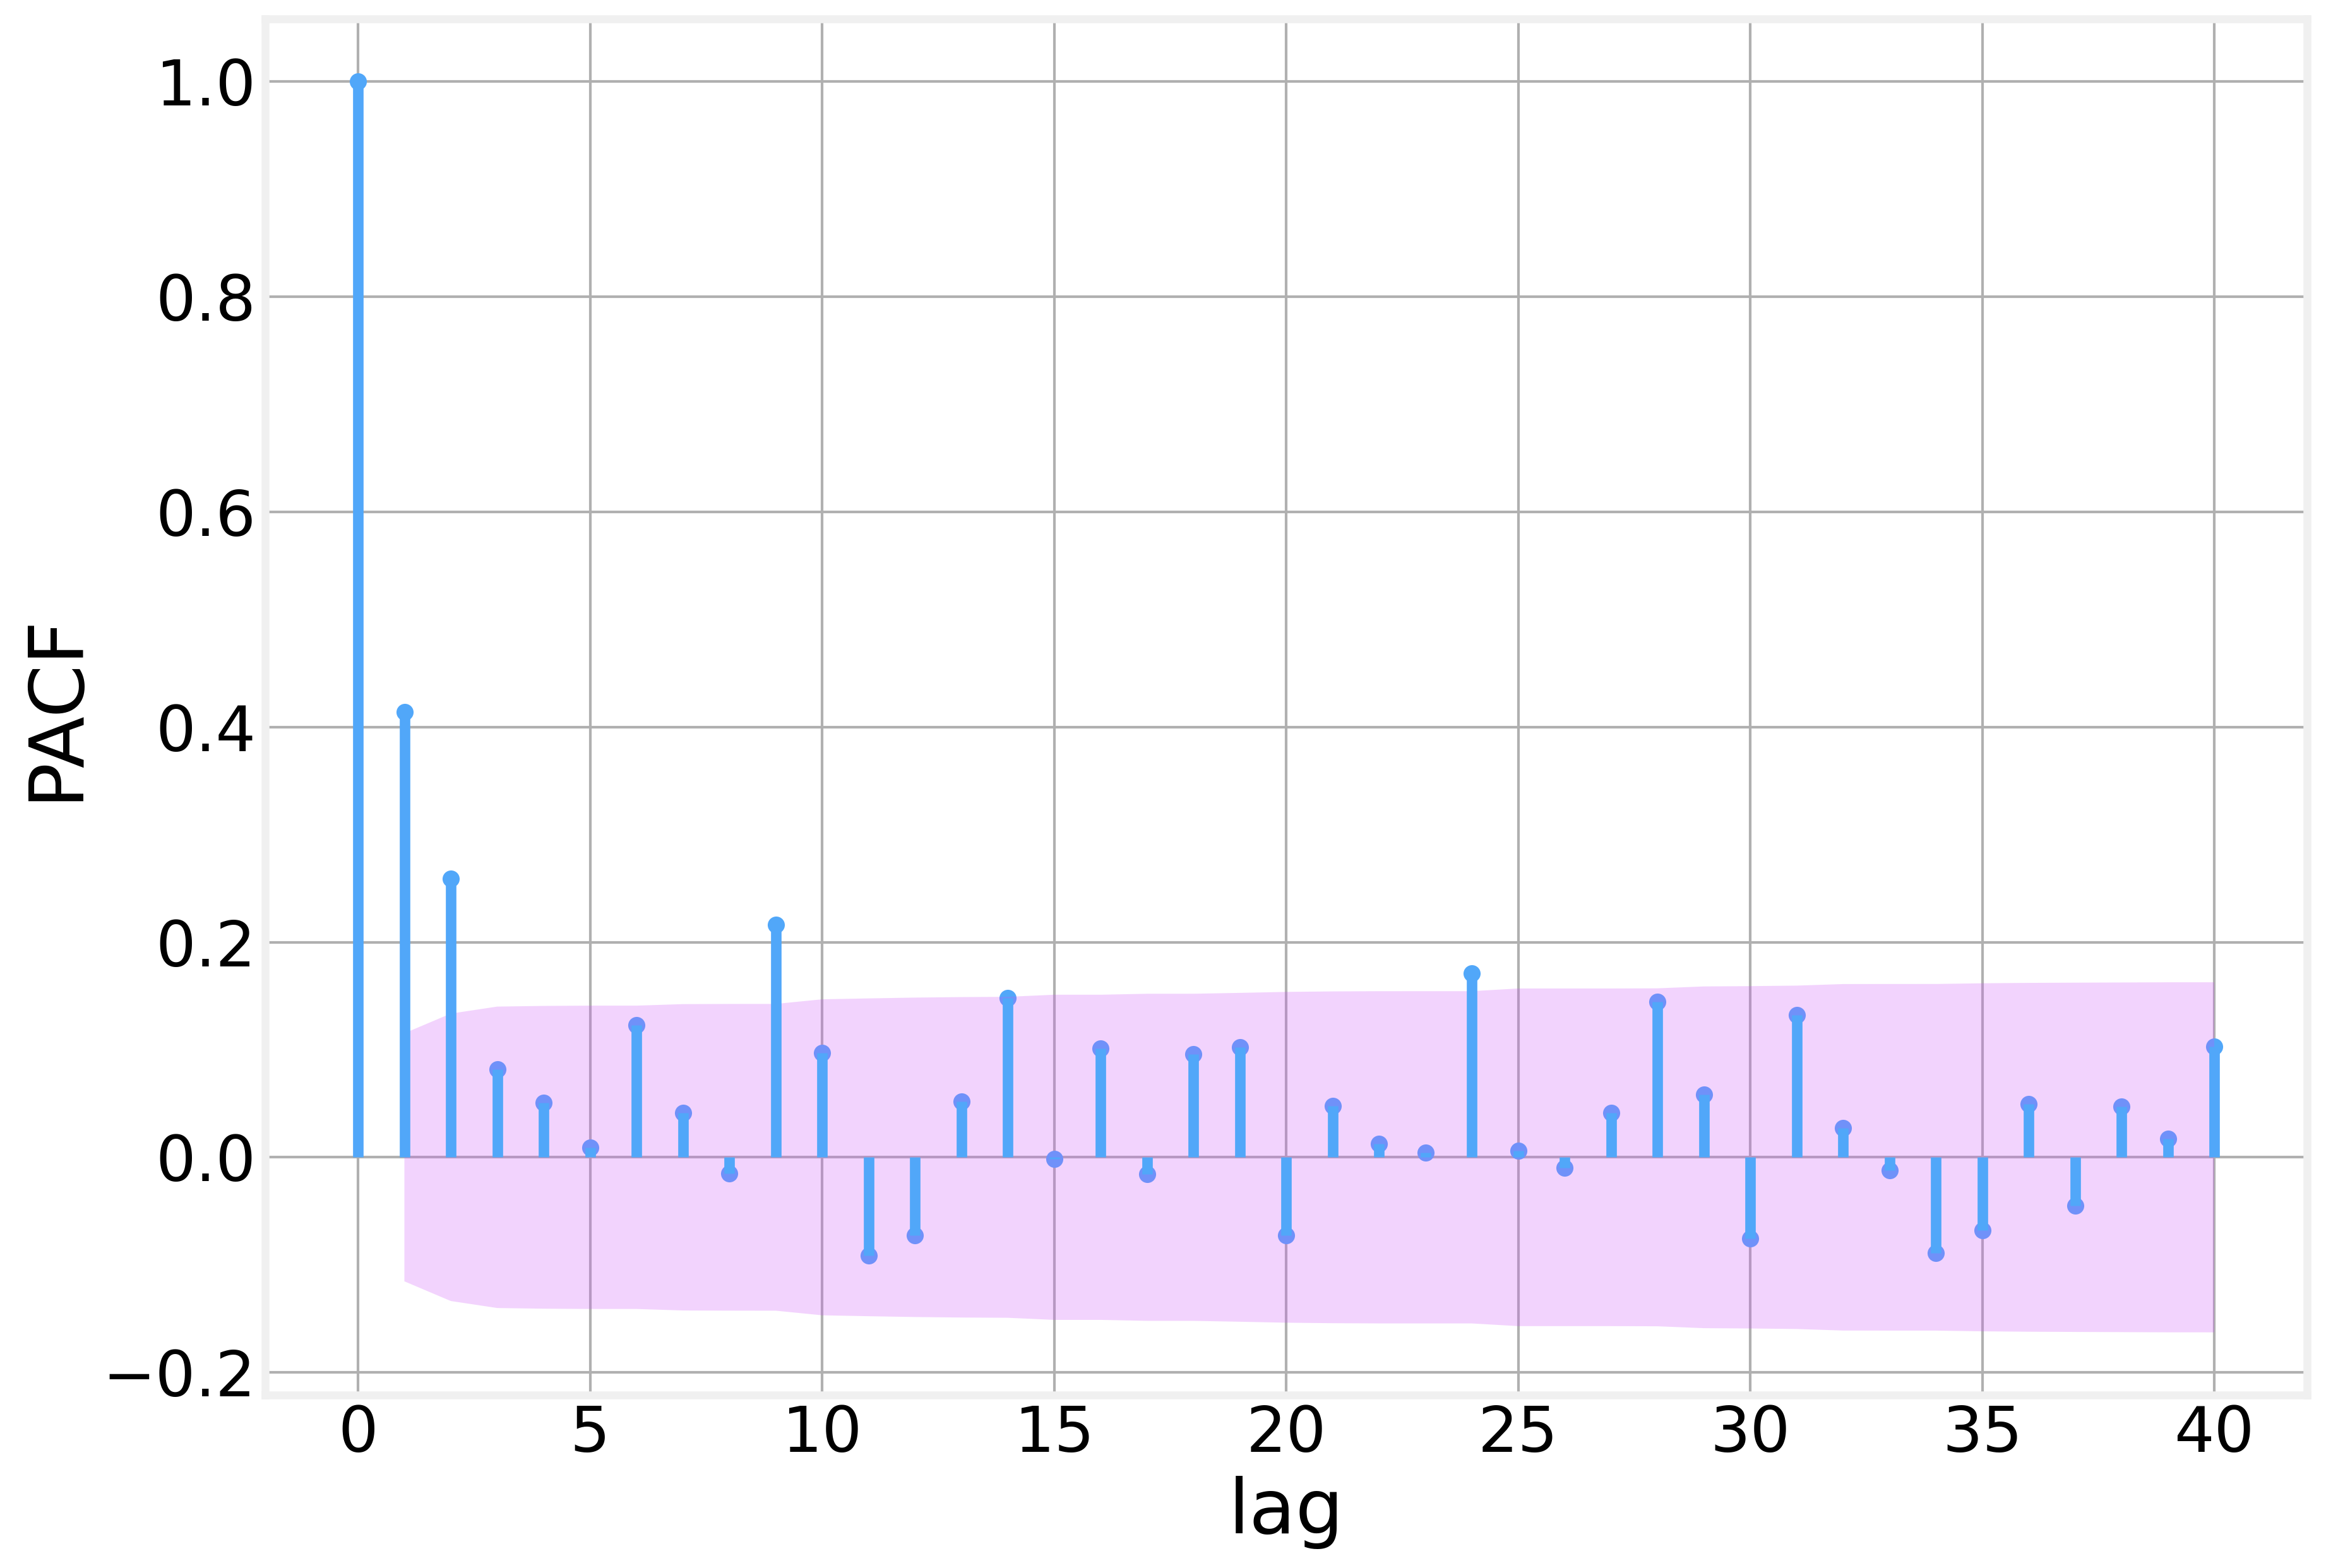

In [24]:
plot_pacf(detrended)